# Sample Final Economic Modeling and Simulation

* Important: the midterm is different from the sample in significant ways, so if you just copy-paste the code your solutions will be most likely wrong and your grade will be penalized. If I detect errors that show that you have __copied from another classmate, your grade will me penalized__ even more.

* The maximum score is 100 points, and you can get an additional 10 pts if your code is __particulary clean and original__; in other words, you can score less than 100 point in the exercises and still get a 100.

* This exam is __open-book__: you may also lookup on the internet as long as you do not communicate with your classmates or anyone else.

* The total amount of points is 100, but you can get up to 15 bonus points if your code is clean and/or elegant. In other words, you do not need to get everything right to get the maximum grade. However, it is __critical that the code runs__ and that there are no execution errors: a code that runs but that misses some calculations will be graded benevolently; a code that does not run will not.

* The midterm involves quite a lot of __plotting__; I have used the library `matplotlib.pyplot` extensively in the sample midterm because I find it easier for you to apply to time series, compared to `seaborn`. However, you are of course free to use `seaborn` if you prefer.

* Store the plots in files with `plt.savefig()`; clean the canvas after every plot with `plt.clf()`

* For the exercises below you will need the following libraries, parameters, and code to create the path for the plots:

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from pathlib import Path
from pmdarima.arima import StepwiseContext

In [3]:
from pathlib import Path

In [18]:
plt.style.use("seaborn-v0_8")
matplotlib.rcParams["axes.labelsize"] = 14
matplotlib.rcParams["xtick.labelsize"] = 12
matplotlib.rcParams["ytick.labelsize"] = 12
matplotlib.rcParams["text.color"] = "k"
matplotlib.rcParams["figure.dpi"] = 200

### Exercise 1: Exploratory analysis and regression [40 pts]

(1) [0 pts] Load the dataset stored in `.lesson/assets/winequality-red.csv`. The separator is a semicolon.

In [19]:
red_wine = pd.read_csv('.lesson/assets/winequality-red.csv', sep=';')

(2) [5 pts] Count the number of occurrences of each value of `quality`, i.e. how many red wines score quality 0, how many score quality 1, and so on.

In [20]:
red_wine['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

(3) [5 pts] Plot a histogram with the distributions of `quality` and `alcohol`.

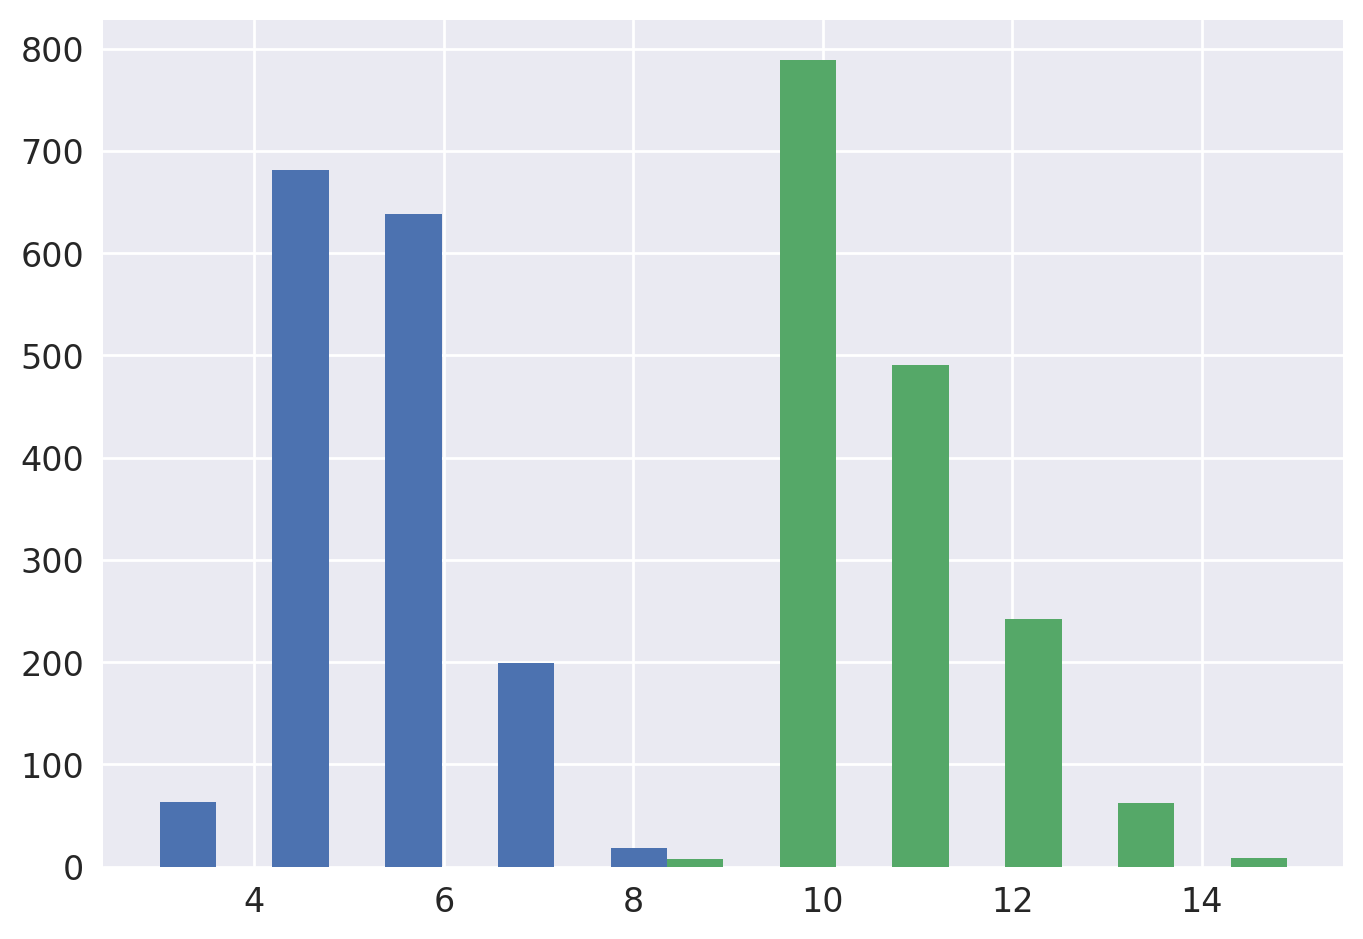

In [21]:
plt.hist(red_wine[['quality', 'alcohol']], rwidth=1, bins=10, label='quality')
plt.show()

(4) [5 pts] Build a linear regression where `quality` is the `y` variable and `alcohol` the `x` variable; print a summary of the results, and the intercept and the slope.

In [22]:
formula = 'quality ~ alcohol'
model = smf.ols(formula, data = red_wine)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Sat, 06 May 2023   Prob (F-statistic):           2.83e-91
Time:                        13:31:54   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
inter = results.params['Intercept']
slope = results.params['alcohol']
print(f'{inter=}')
print(f'{slope=}')

inter=1.8749748869971365
slope=0.36084176533503637


(5) [5 pts] Build a scatterplot where `alcohol` is the `x` variable and `quality` the `y` variable; include `pH` as the color.

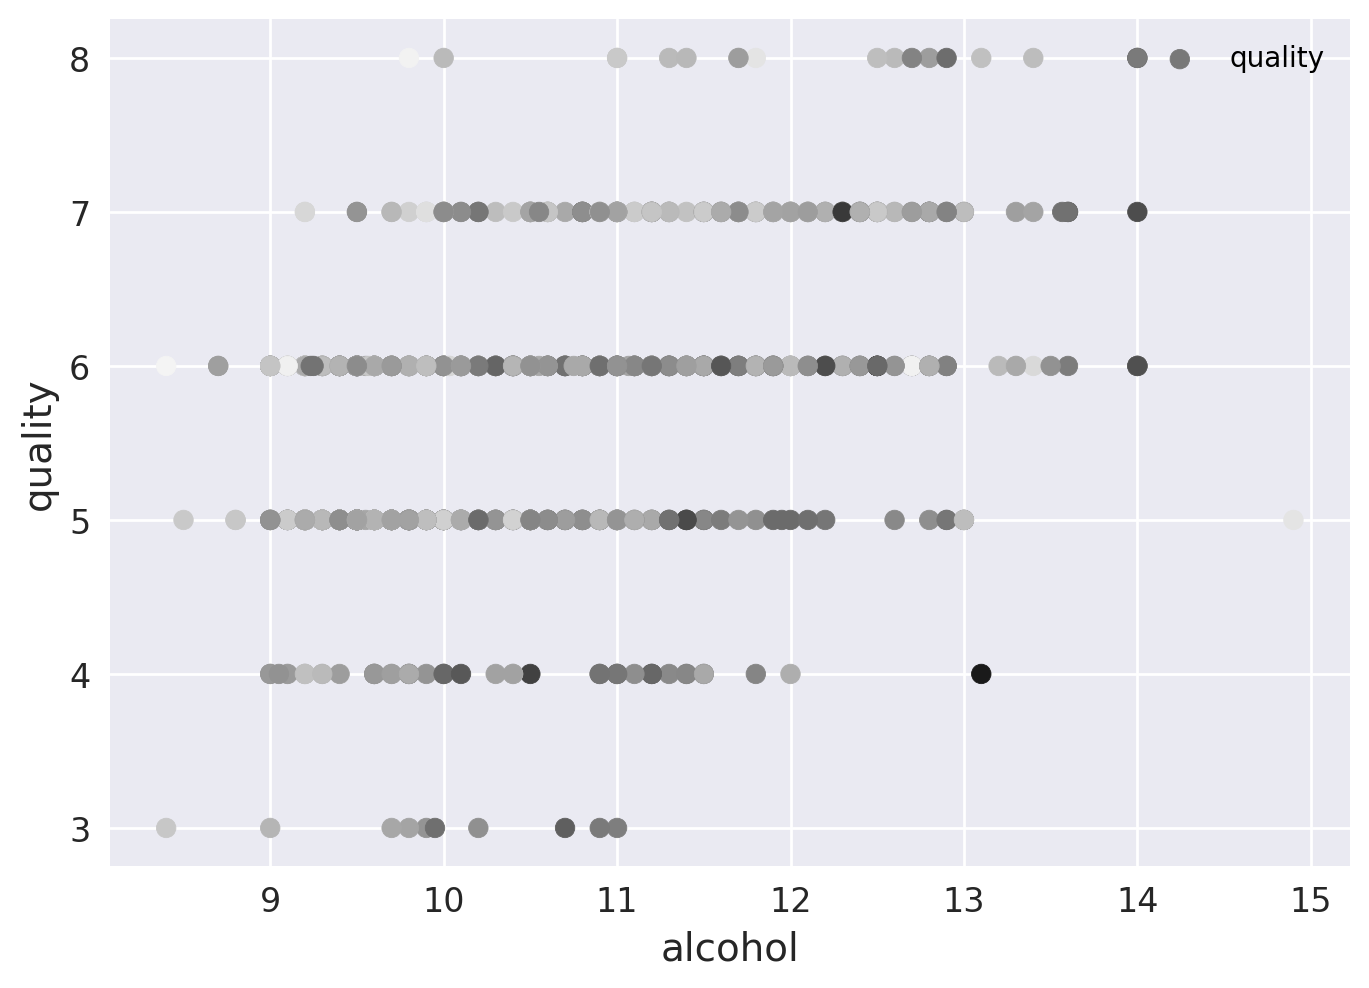

<Figure size 1600x1100 with 0 Axes>

In [24]:
plt.scatter(x='alcohol',y='quality', c='pH', data=red_wine)
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.legend()
plt.show()
plt.clf()

(6) [5 pts] Build another linear regression with the regressors `alcohol`, `pH`, `chlorides`, and `density` in order to predict the `quality`. Print the intercept and slope of `alcohol`.

In [25]:
formula = 'quality ~ alcohol + pH + chlorides + density'
model = smf.ols(formula, data = red_wine)
results = model.fit()
results.summary()
inter = results.params['Intercept']
slope = results.params['alcohol']
print(f'{inter=}')
print(f'{slope=}')

inter=-10.646846717794306
slope=0.3893520367474799


(7) [5 pts] Load the dataset stored in `.lesson/assets/winequality-white.csv`. Concatenate it to the dataset we read in (1). Draw a boxplot showing the quality distribution of each type of wine.

In [26]:
red_wine['category'] = 'red'
white_wine = pd.read_csv('.lesson/assets/winequality-white.csv', sep=';')
white_wine['category'] = 'white'

In [27]:
wine = pd.concat([white_wine, red_wine])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


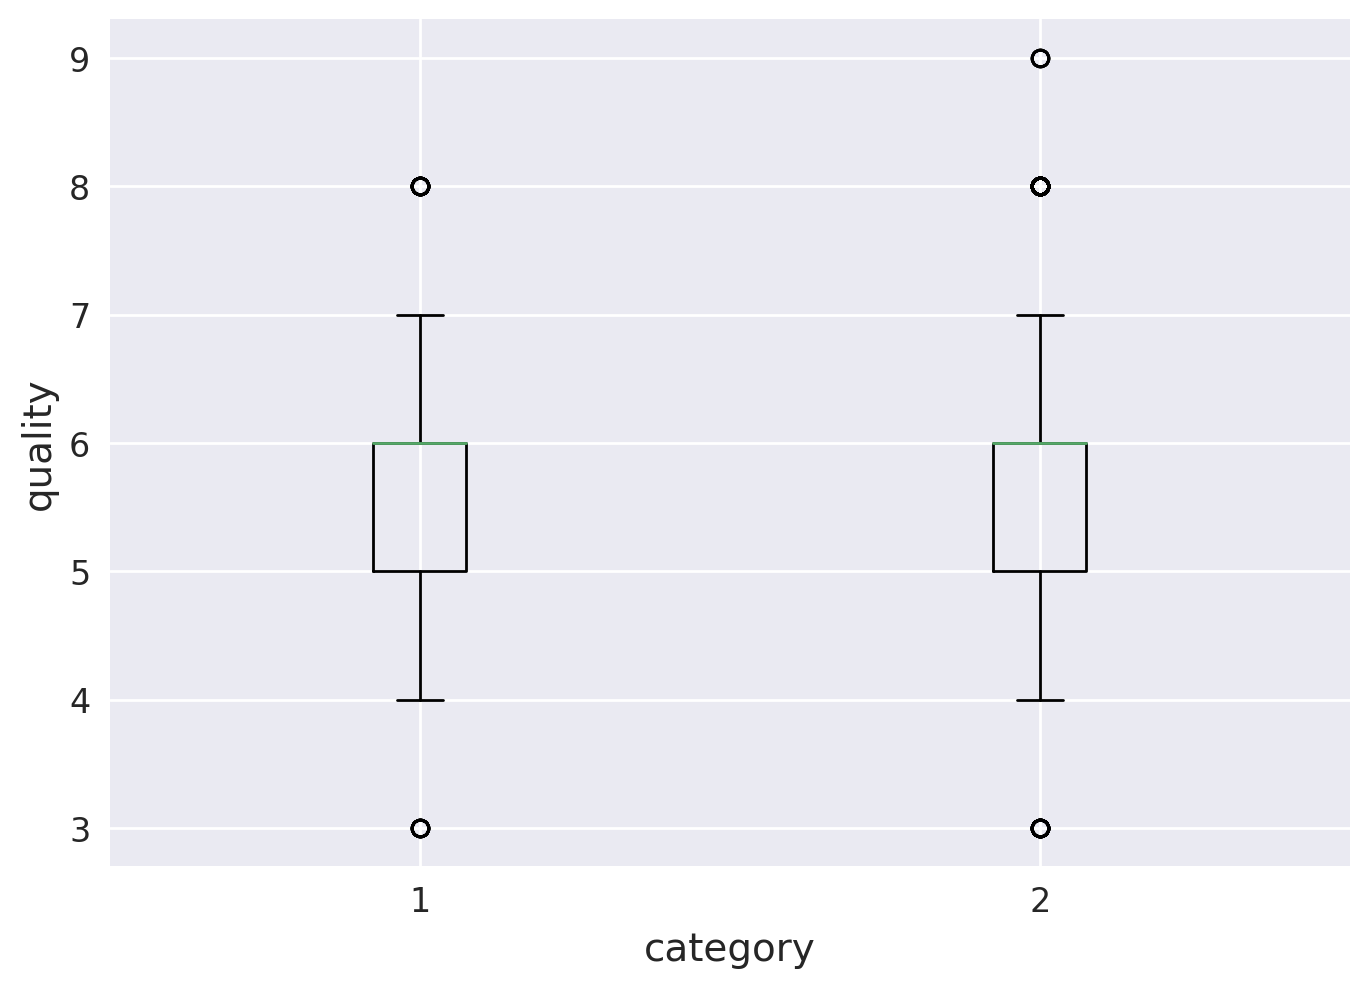

<Figure size 1600x1100 with 0 Axes>

In [28]:
plt.boxplot(x=[red_wine.quality, white_wine.quality])
plt.xlabel('category')
plt.ylabel('quality')
plt.legend()
plt.show()
plt.clf()

(8) [5 pts] Build a logistic regression that predicts whether a wine is red or white based on the same regressors we used in (6). You will need to generate a binary variable named `red`.

In [29]:
wine['red'] = (wine['category'] == 'red') * 1
formula = 'red ~ alcohol + pH + chlorides + density'
model = smf.logit(formula, data=wine)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.241651
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    red   No. Observations:                 6497
Model:                          Logit   Df Residuals:                     6492
Method:                           MLE   Df Model:                            4
Date:                Sat, 06 May 2023   Pseudo R-squ.:                  0.5670
Time:                        13:32:03   Log-Likelihood:                -1570.0
converged:                       True   LL-Null:                       -3625.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -770.3419     29.596    -26.029      0.000    -828.349    -712.335
alcohol        1.4423      0.066     21.706      0.000       1.312       1.573
pH             6.3365      0.312     20.312      0.000       5.725       6.948
chlorides     65.4612      2.201     29.747      0.000      61.148      69.774
density      732.8827     29.004     25.268      0.000     676.036     789.730
==============================================================================
"""

(9) [5 pts] Estimate the probabilities that a wine is red given its `alcohol` is 11, its `pH` is 3.3, its `chlorides` are 0.06, and its `density` is 1.

In [30]:
new = pd.DataFrame([[11, 3.3, 0.06, 1]], columns=['alcohol', 'pH', 'chlorides', 'density'])
y = results.predict(new)
print(f'The chances of this wine being red are {y[0]}')

The chances of this wine being red are 0.9624659444076975


### Exercise 2